In [2]:
import networkx as nx
import importlib
from collections import deque
import matplotlib.pyplot as plt
import production_graph as pg
import planner as pln

In [3]:
#%load_ext autoreload
#%autoreload 2


In [4]:
# Ejemplo de uso:
G = nx.DiGraph()
G.add_edges_from([
    ("A","C"),("B","C"),("C","D"),("C","E"),("D","F"),("D","G"),("F","K"),("G","K"),("E","K")
])




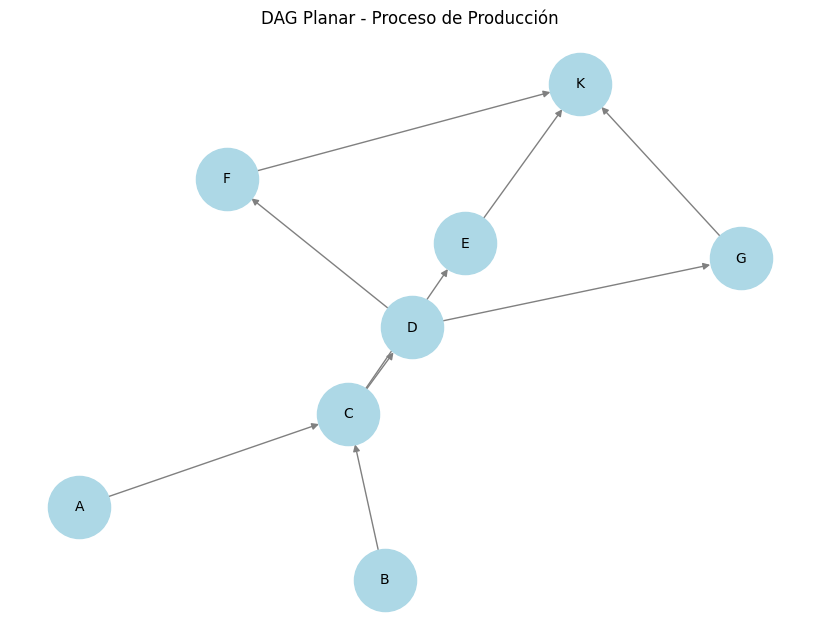

In [5]:

# Graficar el DAG con la disposición personalizada
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10, arrows=True)
plt.title("DAG Planar - Proceso de Producción")
plt.show()

In [6]:
print(list(nx.topological_sort(G)))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'K']


In [7]:
proceso = pln.Proceso_productivo(G)

In [8]:
proceso.get_grafo()

In [9]:
plan = [0,0,1,1,1,0,1,0,1,0,1,0,1,1,1,0,0,1]

In [10]:
len(plan)

18

In [11]:
proceso.crear_plan_produccion(plan)

[('A', 'comprar', 'ZF'),
 ('A', 'comprar', 'ZF'),
 ('A', 'comprar', 'NCT'),
 ('B', 'comprar', 'NCT'),
 ('B', 'comprar', 'NCT'),
 ('B', 'comprar', 'ZF'),
 ('C', 'producir', 'NCT'),
 ('C', 'producir', 'ZF'),
 ('C', 'producir', 'NCT'),
 ('D', 'producir', 'ZF'),
 ('D', 'producir', 'NCT'),
 ('E', 'producir', 'ZF'),
 ('F', 'producir', 'NCT'),
 ('G', 'producir', 'NCT'),
 ('K', 'producir', 'NCT')]

In [12]:
proceso = pln.Proceso_productivo(G)

In [13]:
planeador = pln.Planner(proceso)

In [14]:
planeador._proceso_productivo.crear_plan_produccion(plan)

[('A', 'comprar', 'ZF'),
 ('A', 'comprar', 'ZF'),
 ('A', 'comprar', 'NCT'),
 ('B', 'comprar', 'NCT'),
 ('B', 'comprar', 'NCT'),
 ('B', 'comprar', 'ZF'),
 ('C', 'producir', 'NCT'),
 ('C', 'producir', 'ZF'),
 ('C', 'producir', 'NCT'),
 ('D', 'producir', 'ZF'),
 ('D', 'producir', 'NCT'),
 ('E', 'producir', 'ZF'),
 ('F', 'producir', 'NCT'),
 ('G', 'producir', 'NCT'),
 ('K', 'producir', 'NCT')]

In [15]:
planeador.ejecutar_plan(plan)

[(('ZF', 'MKT'), 'compra', 'A'),
 (('ZF', 'MKT'), 'compra', 'A'),
 (('NCT', 'ZF'), 'compra', 'A'),
 (('NCT', 'MKT'), 'compra', 'B'),
 (('NCT', 'MKT'), 'compra', 'B'),
 (('ZF', 'NCT'), 'compra', 'B'),
 (('NCT',), 'producción', 'C'),
 (('ZF',), 'producción', 'C'),
 (('NCT', 'MKT'), 'compra', 'A'),
 (('NCT', 'MKT'), 'compra', 'B'),
 (('NCT',), 'producción', 'C'),
 (('ZF',), 'producción', 'D'),
 (('NCT',), 'producción', 'D'),
 (('ZF', 'NCT'), 'compra', 'C'),
 (('ZF',), 'producción', 'E'),
 (('NCT',), 'producción', 'F'),
 (('NCT', 'ZF'), 'compra', 'D'),
 (('NCT',), 'producción', 'G'),
 (('NCT', 'ZF'), 'compra', 'E'),
 (('NCT',), 'producción', 'K')]